In [2]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
coffea_no_caff = pd.read_csv(r"..\input\no_caffeine_data_for_clustering.csv")

In [14]:
coffea_no_caff

,specimen_id,source_crs,longitude,latitude,mada_geom_point,sampled_layers,nodata_layers,is_categorical_encoded,genus_species,year,...,layer_78_RetDisp_Mahavavy,layer_78_RetDisp_Manampatrana,layer_78_RetDisp_Mananara_du_Sud,layer_78_RetDisp_Mandrare,layer_78_RetDisp_Mangoky,layer_78_RetDisp_Mangoro,layer_78_RetDisp_Onilahy,layer_78_RetDisp_Sambirano,layer_78_RetDisp_Tsiribihina,layer_78__nodata
0,heimii_14672,4326,49.263119,-12.279828,POINT (963987.2160799548 8638826.905155072),79,8,True,Coffea heimii,2020.0,...,0,0,0,0,0,0,0,0,0,1
1,heimii_16490,4326,49.347115,-12.210881,POINT (973268.3172334379 8646324.57726909),79,78,True,Coffea heimii,2020.0,...,0,0,0,0,0,0,0,0,0,1
2,heimii_16893,4326,49.303872,-12.318289,POINT (968361.9252714938 8634492.083777336),79,0,True,Coffea heimii,2020.0,...,0,0,0,0,0,0,0,0,0,0
3,heimii_16895,4326,49.226443,-12.281807,POINT (959985.3753017825 8638670.640734412),79,78,True,Coffea heimii,2020.0,...,0,0,0,0,0,0,0,0,0,1
4,heimii_17832,4326,49.342500,-12.396327,POINT (972432.2872414208 8625771.941739332),79,0,True,Coffea heimii,2019.0,...,0,0,0,0,0,0,0,0,0,0
5,heimii_17834,4326,49.275700,-12.398991,POINT (965147.7496670873 8625594.36152296),79,0,True,Coffea heimii,2019.0,...,0,0,0,0,0,0,0,0,0,0
6,heimii_19479,4326,49.569592,-12.454103,POINT (997074.80834441 8618950.269213684),79,7,True,Coffea heimii,2019.0,...,0,0,0,0,0,0,0,0,0,1
7,heimii_19555,4326,49.549809,-12.580463,POINT (994676.992488631 8604973.911008792),79,0,True,Coffea heimii,2019.0,...,0,0,0,0,0,0,0,0,0,0
8,humbertii_7021,4326,43.610638,-23.078725,POINT (357689.0386163351 7447088.901125943),79,1,True,Coffea humbertii,2024.0,...,0,0,0,0,0,0,0,0,0,0
9,humbertii J.-F.Leroy_8949,4326,44.136600,-23.531800,POINT (411865.5851767542 7397342.999132204),79,0,True,Coffea humbertii J.-F.Leroy,2020.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
coffea_no_caff.describe()

,source_crs,longitude,latitude,sampled_layers,nodata_layers,year,layer_1,layer_2,layer_3,layer_4,...,layer_78_RetDisp_Mahavavy,layer_78_RetDisp_Manampatrana,layer_78_RetDisp_Mananara_du_Sud,layer_78_RetDisp_Mandrare,layer_78_RetDisp_Mangoky,layer_78_RetDisp_Mangoro,layer_78_RetDisp_Onilahy,layer_78_RetDisp_Sambirano,layer_78_RetDisp_Tsiribihina,layer_78__nodata
count,48.0,48.000000,48.000000,48.0,48.000000,48.000000,45.000000,45.000000,45.000000,45.000000,...,48.0,48.0,48.0,48.000000,48.0,48.0,48.0,48.0,48.0,48.000000
mean,4326.0,47.118144,-17.619556,79.0,5.458333,2020.979167,190.533333,218.422222,213.266667,202.466667,...,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.125000
std,0.0,2.125626,4.852640,0.0,19.022896,1.643680,25.958533,16.683537,21.091144,29.653760,...,0.0,0.0,0.0,0.201941,0.0,0.0,0.0,0.0,0.0,0.334219
min,4326.0,43.610638,-24.560833,79.0,0.000000,2019.000000,153.000000,191.000000,182.000000,157.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,4326.0,45.781687,-22.853611,79.0,0.000000,2019.750000,163.000000,199.000000,189.000000,173.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
50%,4326.0,46.333889,-17.077951,79.0,0.000000,2020.500000,203.000000,225.000000,221.000000,214.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
75%,4326.0,49.308431,-12.392967,79.0,0.000000,2022.000000,212.000000,229.000000,229.000000,227.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
max,4326.0,49.569592,-12.210881,79.0,78.000000,2024.000000,224.000000,242.000000,242.000000,241.000000,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000


In [27]:
coffea = coffea_no_caff.copy()

In [28]:
#coffea.drop(columns=['source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded', 'genus_species', 'specimen_id'],inplace=True)
coffea.drop(columns=['source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded', 'genus_species', 'specimen_id','latitude', 'longitude', 'year'],inplace=True)

In [29]:
coffea


,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,...,layer_78_RetDisp_Mahavavy,layer_78_RetDisp_Manampatrana,layer_78_RetDisp_Mananara_du_Sud,layer_78_RetDisp_Mandrare,layer_78_RetDisp_Mangoky,layer_78_RetDisp_Mangoro,layer_78_RetDisp_Onilahy,layer_78_RetDisp_Sambirano,layer_78_RetDisp_Tsiribihina,layer_78__nodata
0,220.0,238.0,239.0,236.0,230.0,215.0,205.0,204.0,210.0,231.0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,223.0,240.0,240.0,238.0,232.0,216.0,206.0,206.0,212.0,234.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,209.0,229.0,229.0,227.0,219.0,202.0,194.0,193.0,199.0,222.0,...,0,0,0,0,0,0,0,0,0,0
5,208.0,228.0,228.0,225.0,216.0,200.0,192.0,192.0,197.0,220.0,...,0,0,0,0,0,0,0,0,0,0
6,219.0,239.0,237.0,236.0,227.0,211.0,204.0,204.0,209.0,232.0,...,0,0,0,0,0,0,0,0,0,1
7,218.0,238.0,237.0,235.0,225.0,207.0,200.0,201.0,207.0,231.0,...,0,0,0,0,0,0,0,0,0,0
8,177.0,220.0,208.0,182.0,154.0,141.0,131.0,138.0,153.0,202.0,...,0,0,0,0,0,0,0,0,0,0
9,179.0,218.0,207.0,182.0,150.0,134.0,124.0,130.0,152.0,201.0,...,0,0,0,0,0,0,0,0,0,0


Managing NaN values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(coffea)


Scaling data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)


K-means

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans_labels = kmeans.fit_predict(df_scaled)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

For the columns containing categorical data, (rock_types, soil_types, veg_types and watersheds), the values will be broken done into 2 groups : Optimal for growth(1) or not(0)

`veg_types` will be dropped since categories are not available, therefore we are unable to interpret

In [16]:
coffea.drop(columns=['veg_types'], inplace=True)
coffea

,specimen_id,longitude,latitude,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,...,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage
0,spe1_duba,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,...,391.0,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,1.0,34.0
1,spe1_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,...,391.0,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,1.0,34.0
2,spe1_moge,49.166389,-12.524444,144.0,170.0,171.0,167.0,153.0,135.0,132.0,...,239.0,7.0,1079.0,13.0,58.0,8192.0,9.0,8.0,12.0,100.0
3,spe2_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,...,391.0,8.0,582.0,6.0,12.0,8169.0,9.0,8.0,1.0,34.0
4,spe2_duba,49.083333,-12.900000,208.0,227.0,229.0,225.0,211.0,191.0,184.0,...,623.0,8.0,165.0,28.0,358.0,7892.0,7.0,22.0,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,49.180000,-12.530000,145.0,173.0,173.0,169.0,155.0,138.0,134.0,...,246.0,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,12.0,100.0
185,spe66_moge,49.180000,-12.530000,145.0,173.0,173.0,169.0,155.0,138.0,134.0,...,246.0,7.0,1095.0,4.0,10.0,8252.0,9.0,8.0,12.0,100.0
186,spe76_duba,49.700000,-13.180000,200.0,225.0,222.0,219.0,204.0,185.0,181.0,...,360.0,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,1.0,24.0
187,spe77_duba,49.700000,-13.180000,200.0,225.0,222.0,219.0,204.0,185.0,181.0,...,360.0,8.0,171.0,8.0,36.0,7888.0,10.0,9.0,1.0,24.0


Favorable rock types are only one category which is category 1 : `Alluvial_&_Lake_deposits`

All other values will be set to 0

In [18]:
# Set all values of column 'A' to 0 except for the value 1
coffea['rock_types'] = coffea['rock_types'].apply(lambda x: 1 if x == 1 else 0)

# Print the updated DataFrame
print(coffea)

    specimen_id  longitude   latitude  tmin1  tmin2  tmin3  tmin4  tmin5  \
0     spe1_duba  49.213056 -12.479722  175.0  199.0  200.0  196.0  183.0   
1     spe1_auga  49.213056 -12.479722  175.0  199.0  200.0  196.0  183.0   
2     spe1_moge  49.166389 -12.524444  144.0  170.0  171.0  167.0  153.0   
3     spe2_auga  49.213056 -12.479722  175.0  199.0  200.0  196.0  183.0   
4     spe2_duba  49.083333 -12.900000  208.0  227.0  229.0  225.0  211.0   
..          ...        ...        ...    ...    ...    ...    ...    ...   
184  spe65_moge  49.180000 -12.530000  145.0  173.0  173.0  169.0  155.0   
185  spe66_moge  49.180000 -12.530000  145.0  173.0  173.0  169.0  155.0   
186  spe76_duba  49.700000 -13.180000  200.0  225.0  222.0  219.0  204.0   
187  spe77_duba  49.700000 -13.180000  200.0  225.0  222.0  219.0  204.0   
188  spe67_moge  49.166670 -12.516670  147.0  173.0  173.0  170.0  156.0   

     tmin6  tmin7  ...  cwd_annual  ndm_year  altitude  slope  aspect  solrad  \
0    1

In [19]:
pd.set_option('display.max_columns', None)
coffea

,specimen_id,longitude,latitude,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9,tmin10,tmin11,tmin12,tmax1,tmax2,tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9,tmax10,tmax11,tmax12,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,annual_mean_temp,mean_diurnal_range,isothermality,temp_seasonality,max_temp_warmest_month,min_temp_coldest_month,temp_annual_range,mean_temp_wettest_quarter,mean_temp_driest_quarter,mean_temp_warmest_quarter,mean_temp_coldest_quarter,annual_prec,prec_wettest_month,prec_driest_month,prec_seasonality_cov,prec_wettest_quarter,prec_driest_quarter,prec_warmest_quarter,prec_coldest_quarter,pet1,pet2,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage
0,spe1_duba,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,8.0,1.0,34.0
1,spe1_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,8.0,1.0,34.0
2,spe1_moge,49.166389,-12.524444,144.0,170.0,171.0,167.0,153.0,135.0,132.0,132.0,134.0,158.0,166.0,172.0,252.0,261.0,260.0,257.0,250.0,240.0,225.0,227.0,239.0,261.0,261.0,259.0,25.0,273.0,228.0,100.0,28.0,24.0,30.0,24.0,16.0,73.0,225.0,307.0,201.0,96.0,74.0,1461.0,261.0,132.0,129.0,212.0,181.0,214.0,181.0,1353.0,307.0,16.0,98.0,605.0,70.0,601.0,70.0,76.0,91.0,89.0,84.0,73.0,61.0,53.0,54.0,60.0,79.0,85.0,89.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,8.0,12.0,100.0
3,spe2_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,8.0,1.0,34.0
4,spe2_duba,49.083333,-12.900000,208.0,227.0,229.0,225.0,211.0,191.0,184.0,187.0,195.0,222.0,224.0,226.0,316.0,309.0,311.0,313.0,310.0,302.0,292.0,294.0,304.0,322.0,318.0,307.0,29.0,387.0,259.0,103.0,19.0,19.0,18.0,17.0,14.0,85.0,252.0,412.0,259.0,97.0,70.0,1246.0,322.0,184.0,138.0,265.0,242.0,269.0,241.0,1614.0,412.0,14.0,111.0,828.0,49.0,749.0,54.0,137.0,148.0,149.0,143.0,124.0,99.0,86.0,89.0,103.0,144.0,147.0,142.0,1515.0,623.0,8.0,165.0,28.0,358.0,7892.0,0,22.0,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,49.180000,-12.530000,145.0,173.0,173.0,169.0,155.0,138.0,134.0,133.0,137.0,159.0,168.0,173.0,254.0,263.0,262.0,259.0,251.0,242.0,228.0,228.0,241.0,263.0,263.0,260.0,25.0,274.0,227.0,100.0,27.0,24.0,30.0,24.0,16.0,72.0,224.0,308.0,202.0,96.0,74.0,1454.0,263.0,133.0,130.0,211.0,183.0,216.0,183.0,1351.0,308.0,16.0,98.0,607.0,70.0,601.0,70.0,76.0,93.0,91.0,85.0,74.0,62.0,54.0,54.0,61.0,80.0,86.0,90.0,911.0,246.0,7.0,1095.0,4.0,10.0,8252.0,0,8.0,12.0,100.0
185,spe66_moge,49.18000

As for `soil_types` , values (`2,3,4,6,7,8,11,12,13,14,15,16,17,19,22,23`) are considered favorable and will be set to 1, where as values (`5,9,10,18,20,21`) are viewed as harsh conditions and will be set to 0

In [20]:
# Define the values you want to set to 1
values_to_set_as_1 = [2,3,4,6,7,8,11,12,13,14,15,16,17,19,22,23]

# Set values in column 'A' to 1 if they are in values_to_set_as_1, otherwise set them to 0
coffea['soil_types'] = coffea['soil_types'].apply(lambda x: 1 if x in values_to_set_as_1 else 0)

In [21]:
coffea

,specimen_id,longitude,latitude,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9,tmin10,tmin11,tmin12,tmax1,tmax2,tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9,tmax10,tmax11,tmax12,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,annual_mean_temp,mean_diurnal_range,isothermality,temp_seasonality,max_temp_warmest_month,min_temp_coldest_month,temp_annual_range,mean_temp_wettest_quarter,mean_temp_driest_quarter,mean_temp_warmest_quarter,mean_temp_coldest_quarter,annual_prec,prec_wettest_month,prec_driest_month,prec_seasonality_cov,prec_wettest_quarter,prec_driest_quarter,prec_warmest_quarter,prec_coldest_quarter,pet1,pet2,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage
0,spe1_duba,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
1,spe1_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
2,spe1_moge,49.166389,-12.524444,144.0,170.0,171.0,167.0,153.0,135.0,132.0,132.0,134.0,158.0,166.0,172.0,252.0,261.0,260.0,257.0,250.0,240.0,225.0,227.0,239.0,261.0,261.0,259.0,25.0,273.0,228.0,100.0,28.0,24.0,30.0,24.0,16.0,73.0,225.0,307.0,201.0,96.0,74.0,1461.0,261.0,132.0,129.0,212.0,181.0,214.0,181.0,1353.0,307.0,16.0,98.0,605.0,70.0,601.0,70.0,76.0,91.0,89.0,84.0,73.0,61.0,53.0,54.0,60.0,79.0,85.0,89.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1,12.0,100.0
3,spe2_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
4,spe2_duba,49.083333,-12.900000,208.0,227.0,229.0,225.0,211.0,191.0,184.0,187.0,195.0,222.0,224.0,226.0,316.0,309.0,311.0,313.0,310.0,302.0,292.0,294.0,304.0,322.0,318.0,307.0,29.0,387.0,259.0,103.0,19.0,19.0,18.0,17.0,14.0,85.0,252.0,412.0,259.0,97.0,70.0,1246.0,322.0,184.0,138.0,265.0,242.0,269.0,241.0,1614.0,412.0,14.0,111.0,828.0,49.0,749.0,54.0,137.0,148.0,149.0,143.0,124.0,99.0,86.0,89.0,103.0,144.0,147.0,142.0,1515.0,623.0,8.0,165.0,28.0,358.0,7892.0,0,1,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,49.180000,-12.530000,145.0,173.0,173.0,169.0,155.0,138.0,134.0,133.0,137.0,159.0,168.0,173.0,254.0,263.0,262.0,259.0,251.0,242.0,228.0,228.0,241.0,263.0,263.0,260.0,25.0,274.0,227.0,100.0,27.0,24.0,30.0,24.0,16.0,72.0,224.0,308.0,202.0,96.0,74.0,1454.0,263.0,133.0,130.0,211.0,183.0,216.0,183.0,1351.0,308.0,16.0,98.0,607.0,70.0,601.0,70.0,76.0,93.0,91.0,85.0,74.0,62.0,54.0,54.0,61.0,80.0,86.0,90.0,911.0,246.0,7.0,1095.0,4.0,10.0,8252.0,0,1,12.0,100.0
185,spe66_moge,49.180000,-12.530000,

For `watershed` values (`1,2,3,4,5,6,7,8,9,10,11,12`) are considered favorable and will be set to 1, where as values (`13,14,15,16,17,18,19,20,21,22,23,24,25`) are viewed as harsh conditions and will be set to 0

In [23]:
# Define the values you want to set to 1
values_to_set_as_1 = [1,2,3,4,5,6,7,8,9,10,11,12]

# Set values in column 'A' to 1 if they are in values_to_set_as_1, otherwise set them to 0
coffea['watersheds'] = coffea['watersheds'].apply(lambda x: 1.0 if x in values_to_set_as_1 else 0.0)

coffea

,specimen_id,longitude,latitude,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9,tmin10,tmin11,tmin12,tmax1,tmax2,tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9,tmax10,tmax11,tmax12,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,annual_mean_temp,mean_diurnal_range,isothermality,temp_seasonality,max_temp_warmest_month,min_temp_coldest_month,temp_annual_range,mean_temp_wettest_quarter,mean_temp_driest_quarter,mean_temp_warmest_quarter,mean_temp_coldest_quarter,annual_prec,prec_wettest_month,prec_driest_month,prec_seasonality_cov,prec_wettest_quarter,prec_driest_quarter,prec_warmest_quarter,prec_coldest_quarter,pet1,pet2,pet3,pet4,pet5,pet6,pet7,pet8,pet9,pet10,pet11,pet12,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage
0,spe1_duba,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
1,spe1_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
2,spe1_moge,49.166389,-12.524444,144.0,170.0,171.0,167.0,153.0,135.0,132.0,132.0,134.0,158.0,166.0,172.0,252.0,261.0,260.0,257.0,250.0,240.0,225.0,227.0,239.0,261.0,261.0,259.0,25.0,273.0,228.0,100.0,28.0,24.0,30.0,24.0,16.0,73.0,225.0,307.0,201.0,96.0,74.0,1461.0,261.0,132.0,129.0,212.0,181.0,214.0,181.0,1353.0,307.0,16.0,98.0,605.0,70.0,601.0,70.0,76.0,91.0,89.0,84.0,73.0,61.0,53.0,54.0,60.0,79.0,85.0,89.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1,1.0,100.0
3,spe2_auga,49.213056,-12.479722,175.0,199.0,200.0,196.0,183.0,166.0,161.0,162.0,167.0,189.0,195.0,199.0,276.0,285.0,284.0,282.0,276.0,268.0,254.0,255.0,265.0,285.0,287.0,283.0,20.0,292.0,218.0,97.0,19.0,19.0,29.0,21.0,13.0,60.0,211.0,327.0,228.0,92.0,73.0,1347.0,287.0,161.0,126.0,236.0,210.0,241.0,210.0,1326.0,327.0,13.0,105.0,639.0,63.0,607.0,63.0,93.0,112.0,110.0,104.0,90.0,75.0,65.0,66.0,74.0,98.0,106.0,109.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0
4,spe2_duba,49.083333,-12.900000,208.0,227.0,229.0,225.0,211.0,191.0,184.0,187.0,195.0,222.0,224.0,226.0,316.0,309.0,311.0,313.0,310.0,302.0,292.0,294.0,304.0,322.0,318.0,307.0,29.0,387.0,259.0,103.0,19.0,19.0,18.0,17.0,14.0,85.0,252.0,412.0,259.0,97.0,70.0,1246.0,322.0,184.0,138.0,265.0,242.0,269.0,241.0,1614.0,412.0,14.0,111.0,828.0,49.0,749.0,54.0,137.0,148.0,149.0,143.0,124.0,99.0,86.0,89.0,103.0,144.0,147.0,142.0,1515.0,623.0,8.0,165.0,28.0,358.0,7892.0,0,1,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,spe65_moge,49.180000,-12.530000,145.0,173.0,173.0,169.0,155.0,138.0,134.0,133.0,137.0,159.0,168.0,173.0,254.0,263.0,262.0,259.0,251.0,242.0,228.0,228.0,241.0,263.0,263.0,260.0,25.0,274.0,227.0,100.0,27.0,24.0,30.0,24.0,16.0,72.0,224.0,308.0,202.0,96.0,74.0,1454.0,263.0,133.0,130.0,211.0,183.0,216.0,183.0,1351.0,308.0,16.0,98.0,607.0,70.0,601.0,70.0,76.0,93.0,91.0,85.0,74.0,62.0,54.0,54.0,61.0,80.0,86.0,90.0,911.0,246.0,7.0,1095.0,4.0,10.0,8252.0,0,1,1.0,100.0
185,spe66_moge,49.180000,-12.530000,145

## Temperature columns will be consolidated into a single min temperature and a single max temperature

The minimum of the following columns will be taken and put into the new column `min_temp` : `tmin1, tmin2, tmin3, tmin4, tmin5, tmin6, tmin7, tmin8, tmin9, tmin10, tmin11, tmin12`

`min_temp_coldest_month`, will be dropped since it is redundant information

The maximum of the following columns will be taken and put into the new column `max_temp` : `tmax1, tmax2, tmax3, tmax4, tmax5, tmax6, tmax7, tmax8, tmax9, tmax10, tmax11, tmax12` 

`max_temp_warmest_month`, will be dropped since it is redundant information

In [34]:
#pd.set_option('display.max_rows', None)
#pd.DataFrame({'Column Headers': coffea.columns})

coffea['min_temp'] = coffea[['tmin1', 'tmin2', 'tmin3', 'tmin4', 'tmin5', 'tmin6', 'tmin7', 'tmin8', 'tmin9', 'tmin10', 'tmin11', 'tmin12']].min(axis=1)
coffea['max_temp'] = coffea[['tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5', 'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12']].max(axis=1)

coffea.drop(columns=['tmin1', 'tmin2', 'tmin3', 'tmin4', 'tmin5', 'tmin6', 'tmin7', 'tmin8', 'tmin9', 'tmin10', 'tmin11', 'tmin12'], inplace=True)
coffea.drop(columns=['tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5', 'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12'], inplace=True)

coffea.drop(columns=['min_temp_coldest_month', 'max_temp_warmest_month'], inplace=True)


## Precipitation columns will be consolidated into a single min precipitations and a single max precipitations

The minimum of the following columns will be taken and put into the new column `min_prec` and the maximum of the following columns will be taken and put into the new column `max_prec` : `prec1, prec2, prec3, prec4, prec5, prec6, prec7, prec8, prec9, prec10, prec11, prec12`


In [28]:
coffea['min_prec'] = coffea[['prec1', 'prec2', 'prec3', 'prec4', 'prec5', 'prec6', 'prec7', 'prec8', 'prec9', 'prec10', 'prec11', 'prec12']].min(axis=1)
coffea['max_prec'] = coffea[['prec1', 'prec2', 'prec3', 'prec4', 'prec5', 'prec6', 'prec7', 'prec8', 'prec9', 'prec10', 'prec11', 'prec12']].max(axis=1)

coffea.drop(columns=['prec1', 'prec2', 'prec3', 'prec4', 'prec5', 'prec6', 'prec7', 'prec8', 'prec9', 'prec10', 'prec11', 'prec12'], inplace=True)

## Potential Evapotranspiration (PET) columns will be consolidated into a single min_PET and a single max_PET

The minimum of the following columns will be taken and put into the new column `min_PET` and the maximum of the following columns will be taken and put into the new column `max_PET` : `pet1, pet2, pet3, pet4, pet5, pet6, pet7, pet8, pet9, pet10, pet11, pet12`

In [30]:
coffea['min_PET'] = coffea[['pet1', 'pet2', 'pet3', 'pet4', 'pet5', 'pet6', 'pet7', 'pet8', 'pet9', 'pet10', 'pet11', 'pet12']].min(axis=1)
coffea['max_PET'] = coffea[['pet1', 'pet2', 'pet3', 'pet4', 'pet5', 'pet6', 'pet7', 'pet8', 'pet9', 'pet10', 'pet11', 'pet12']].max(axis=1)

coffea.drop(columns=['pet1', 'pet2', 'pet3', 'pet4', 'pet5', 'pet6', 'pet7', 'pet8', 'pet9', 'pet10', 'pet11', 'pet12'], inplace=True)

The mean, standard deviation and range columns will be dropped since they can be calculated from the other columns, for both temperature and precipitations :
`annual_mean_temp, mean_diurnal_range, isothermality, temp_seasonality, temp_annual_range, mean_temp_wettest_quarter, mean_temp_driest_quarter,	mean_temp_warmest_quarter, mean_temp_coldest_quarter, prec_wettest_month, prec_driest_month, prec_seasonality_cov, prec_wettest_quarter, prec_driest_quarter, prec_warmest_quarter, prec_coldest_quarter`

In [31]:
# Specify the columns to drop
columns_to_drop = ['annual_mean_temp', 'mean_diurnal_range', 'isothermality', 'temp_seasonality', 
                   'temp_annual_range', 'mean_temp_wettest_quarter', 'mean_temp_driest_quarter', 
                   'mean_temp_warmest_quarter', 'mean_temp_coldest_quarter', 'prec_wettest_month', 
                   'prec_driest_month', 'prec_seasonality_cov', 'prec_wettest_quarter', 
                   'prec_driest_quarter', 'prec_warmest_quarter', 'prec_coldest_quarter']

# Drop the specified columns
coffea.drop(columns=columns_to_drop, inplace=True)


In [40]:
coffea.shape
coffea.describe()

,longitude,latitude,annual_prec,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage,min_temp,max_temp,min_prec,max_prec,min_PET,max_PET
count,189.000000,189.000000,188.000000,188.000000,188.000000,188.000000,187.000000,186.000000,186.000000,186.000000,189.0,189.000000,189.000000,187.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,48.658536,-15.003286,1486.414894,1123.382979,316.324468,6.345745,626.053476,9.564516,162.747312,7814.360215,0.0,0.693122,0.841270,63.588235,147.191489,288.670213,23.941489,326.425532,61.329787,117.765957
std,1.128089,4.357381,280.449292,246.054583,210.740878,2.225913,472.608715,6.870118,103.901542,366.973560,0.0,0.462423,0.366395,38.908584,24.453503,25.541573,20.757365,58.486250,14.114799,25.293539
min,44.732222,-24.842778,818.000000,729.000000,0.000000,1.000000,0.000000,0.000000,4.000000,6475.000000,0.0,0.000000,0.000000,0.000000,69.000000,245.000000,1.000000,179.000000,38.000000,78.000000
25%,49.065830,-14.221940,1353.000000,901.000000,214.000000,6.000000,142.000000,4.000000,58.000000,7706.000000,0.0,0.000000,1.000000,21.000000,131.000000,262.000000,14.000000,306.000000,51.000000,91.000000
50%,49.150000,-12.846388,1372.000000,1048.000000,251.000000,7.000000,582.000000,8.000000,172.000000,7908.500000,0.0,1.000000,1.000000,72.000000,144.000000,287.000000,16.000000,309.000000,54.500000,112.000000
75%,49.174722,-12.530000,1594.000000,1250.500000,470.250000,8.000000,1079.000000,13.000000,243.000000,8040.000000,0.0,1.000000,1.000000,100.000000,161.000000,310.000000,22.000000,377.000000,73.000000,141.000000
max,49.985833,-12.310000,2276.000000,1711.000000,834.000000,10.000000,1782.000000,30.000000,358.000000,8353.000000,0.0,1.000000,1.000000,100.000000,207.000000,340.000000,82.000000,486.000000,98.000000,173.000000


In [79]:
data = coffea.copy()
# Affichage des nombres, taux et types des valeurs manquantes par attribut
nb_m = data.isnull().sum().sort_values()
ratio_m = (data.isnull().sum()/data.shape[0]).sort_values()
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

pd.DataFrame({'Types': data[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
specimen_id,object,0,0.000000
longitude,float64,0,0.000000
latitude,float64,0,0.000000
watersheds,float64,0,0.000000
soil_types,int64,0,0.000000
rock_types,int64,0,0.000000
max_prec,float64,1,0.005291
min_prec,float64,1,0.005291
max_temp,float64,1,0.005291
min_temp,float64,1,0.005291


In [80]:
data.duplicated().sum()

0

In [51]:
data['soil_types'] = data.pop('soil_types')
data

,specimen_id,longitude,latitude,annual_prec,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,watersheds,forest_coverage,min_temp,max_temp,min_prec,max_prec,min_PET,max_PET,soil_types
0,spe1_duba,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,1
1,spe1_auga,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,1
2,spe1_moge,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,1
3,spe2_auga,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,1
4,spe2_duba,49.083333,-12.900000,1614.0,1515.0,623.0,8.0,165.0,28.0,358.0,7892.0,0,0.0,12.0,184.0,322.0,14.0,412.0,86.0,149.0,1
5,spe3_duba,49.256111,-12.459167,1298.0,1242.0,491.0,8.0,431.0,6.0,303.0,8063.0,0,1.0,1.0,174.0,298.0,12.0,333.0,73.0,126.0,1
6,spe2_moge,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,1
7,spe1_abba,47.866667,-21.383333,2224.0,1145.0,27.0,1.0,78.0,6.0,11.0,7706.0,0,1.0,0.0,145.0,301.0,71.0,392.0,51.0,138.0,1
8,spe2_abba,46.863333,-24.760833,1260.0,1022.0,77.0,4.0,350.0,14.0,167.0,6475.0,0,1.0,100.0,120.0,297.0,44.0,204.0,44.0,125.0,0
9,spe3_moge,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,1


In [81]:
data1 = data.iloc[:,1:]
data1.shape

(189, 20)

In [83]:
#nb_harsh_min_temp = 
(data1['min_temp'] <= 180).sum()

155

In [108]:
(data1['max_temp'] >= 270).sum()

128

In [88]:
(data1['min_prec'] <= 100).sum()

188

In [89]:
(data1['max_prec'] >= 200).sum()

181

In [93]:
(data1['annual_prec'] >= 2000).sum() 
#(data1['annual_prec'] <= 1500).sum()


22

In [96]:
(data1['ndm_year'] >= 3).sum()
(data1['ndm_year'] <= 1).sum()


22

In [101]:
(data1['altitude'] >= 1800).sum()
(data1['altitude'] <= 600).sum()



94

In [103]:
(data1['cwd_annual'] >= 1200).sum()
(data1['cwd_annual'] <= 300).sum()

113

In [105]:
(data1['slope'] >= 8).sum()
(data1['slope'] <= 2).sum()

113

In [107]:
(data1['forest_coverage'] >= 40).sum()
#(data1['forest_coverage'] <= 20).sum()

127

In [117]:
conditions = [
    (data1['forest_coverage'] <= 20),
    (data1['forest_coverage'] >= 40),
    (data1['slope'] >= 8),
    (data1['slope'] <= 2),
    (data1['cwd_annual'] >= 1200),
    (data1['cwd_annual'] <= 300),
    (data1['altitude'] >= 1800),
    (data1['altitude'] <= 600),
    (data1['ndm_year'] >= 3),
    (data1['ndm_year'] <= 1),
    (data1['annual_prec'] >= 2000),
    (data1['annual_prec'] <= 1500),
    (data1['max_prec'] >= 200),
    (data1['min_prec'] <= 100),
    (data1['max_temp'] >= 300),
    (data1['min_temp'] <= 100),
    (data1['soil_types'] == 0),
    (data1['rock_types'] == 0),
    (data1['watersheds'] == 0)
]

data1['harsh'] = sum((condition for condition in conditions))

data1['harsh']

0       6
1       6
2       8
3       6
4       9
5       7
6       8
7       9
8      10
9       8
10     10
11     11
12     10
13      8
14      8
15      7
16      8
17      8
18      9
19      9
20      9
21      7
22      8
23      8
24      8
25      8
26      8
27      9
28      9
29      8
30      8
31     10
32      8
33      8
34      8
35      8
36      9
37     11
38      9
39      7
40      7
41      7
42      8
43      7
44      8
45      8
46      8
47      7
48      8
49      7
50      8
51     10
52     10
53     10
54     10
55     11
56      8
57      8
58      8
59      8
60      9
61      6
62     11
63     10
64      8
65      9
66      8
67      8
68      8
69      9
70      7
71      7
72      8
73     10
74     10
75      8
76      8
77      7
78      9
79      9
80      8
81      8
82      9
83     11
84      8
85      8
86      8
87      8
88      7
89      9
90     10
91      9
92      9
93      9
94      8
95      8
96      7
97      8
98     11
99      7


In [118]:
pd.set_option('display.max_rows', None)

display(data1['harsh'].value_counts())

harsh
8     81
9     39
7     31
10    23
11     9
6      5
3      1
Name: count, dtype: int64

Lorsque toutes les conditions optimales de culture sont respectees, ce sera Class 0, puisqu'aucune balise de ce que nous considerons une condition defavorable est atteinte.

- Class 0 : 0-4 conditions defavorables sont identifies
- Class 1 : 5-7 conditions defavorables sont identifies
- Class 2 : 8-9 conditions defavorables sont identifies
- Class 3 : 10 et plus conditions defavorables sont identifies

In [119]:
def map_to_optimality_class(harsh_value):
    if harsh_value <= 4:
        return 0
    elif 5 <= harsh_value <= 7:
        return 1
    elif 8 <= harsh_value <= 9:
        return 2
    else:
        return 3

# Apply the function to create the new column "optimality_class"
data1['optimality_class'] = data1['harsh'].apply(map_to_optimality_class)

# Display the DataFrame
print(data1)

     longitude   latitude  annual_prec  pet_annual  cwd_annual  ndm_year  \
0    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
1    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
2    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
3    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
4    49.083333 -12.900000       1614.0      1515.0       623.0       8.0   
5    49.256111 -12.459167       1298.0      1242.0       491.0       8.0   
6    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
7    47.866667 -21.383333       2224.0      1145.0        27.0       1.0   
8    46.863333 -24.760833       1260.0      1022.0        77.0       4.0   
9    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
10   46.850000 -24.800000       1535.0      1172.0        72.0       4.0   
11   47.166111 -24.796389       2116.0      1137.0         0.0       1.0   
12   47.1361

In [120]:
pd.set_option('display.max_columns', None)
data1

,longitude,latitude,annual_prec,pet_annual,cwd_annual,ndm_year,altitude,slope,aspect,solrad,rock_types,soil_types,watersheds,forest_coverage,min_temp,max_temp,min_prec,max_prec,min_PET,max_PET,harsh,optimality_class
0,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,6,1
1,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,6,1
2,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,8,2
3,49.213056,-12.479722,1326.0,1108.0,391.0,8.0,582.0,6.0,12.0,8169.0,0,1,1.0,34.0,161.0,287.0,13.0,327.0,65.0,112.0,6,1
4,49.083333,-12.900000,1614.0,1515.0,623.0,8.0,165.0,28.0,358.0,7892.0,0,1,0.0,12.0,184.0,322.0,14.0,412.0,86.0,149.0,9,2
5,49.256111,-12.459167,1298.0,1242.0,491.0,8.0,431.0,6.0,303.0,8063.0,0,1,1.0,1.0,174.0,298.0,12.0,333.0,73.0,126.0,7,1
6,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,8,2
7,47.866667,-21.383333,2224.0,1145.0,27.0,1.0,78.0,6.0,11.0,7706.0,0,1,1.0,0.0,145.0,301.0,71.0,392.0,51.0,138.0,9,2
8,46.863333,-24.760833,1260.0,1022.0,77.0,4.0,350.0,14.0,167.0,6475.0,0,0,1.0,100.0,120.0,297.0,44.0,204.0,44.0,125.0,10,3
9,49.166389,-12.524444,1353.0,901.0,239.0,7.0,1079.0,13.0,58.0,8192.0,0,1,1.0,100.0,132.0,261.0,16.0,307.0,53.0,91.0,8,2


In [124]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(data1)

df_imputed = pd.DataFrame(df_imputed, columns=data1.columns)

print(df_imputed)

     longitude   latitude  annual_prec  pet_annual  cwd_annual  ndm_year  \
0    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
1    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
2    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
3    49.213056 -12.479722       1326.0      1108.0       391.0       8.0   
4    49.083333 -12.900000       1614.0      1515.0       623.0       8.0   
5    49.256111 -12.459167       1298.0      1242.0       491.0       8.0   
6    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
7    47.866667 -21.383333       2224.0      1145.0        27.0       1.0   
8    46.863333 -24.760833       1260.0      1022.0        77.0       4.0   
9    49.166389 -12.524444       1353.0       901.0       239.0       7.0   
10   46.850000 -24.800000       1535.0      1172.0        72.0       4.0   
11   47.166111 -24.796389       2116.0      1137.0         0.0       1.0   
12   47.1361

In [135]:
df_imputed.to_csv('coffea_simplified3.csv', index=False)

In [128]:
import numpy as np
import pandas as pd

def plot_graph(src,val1,val2):

    data1 = src.iloc[:,val1:val2]
    #print(data1)

    means = np.mean(data1, axis=0)
    std_devs = np.std(data1, axis=0)

    # Feature indexes for plotting
    #features = np.arange(1, len(data1.columns)+1)
    #features = np.arange(1, 9)
    features = data1.columns[0: val2-1]

    #print(features)

    # Plotting the error bars
    plt.errorbar(features, means, yerr=std_devs, capsize=5, ecolor='red', linestyle='None', marker='s', markersize=5,elinewidth=2)
    plt.xlabel('Feature Number')
    plt.ylabel('Mean Value')
    plt.xticks(features, rotation=90)
    plt.title('Error Bar of Mean for Each Feature in the Iris Dataset')

    plt.show()
    
plot_graph(df_imputed,2,11)
plot_graph(df_imputed,11,22)


Index(['annual_prec', 'pet_annual', 'cwd_annual', 'ndm_year', 'altitude',
       'slope', 'aspect', 'solrad', 'rock_types'],
      dtype='object')


<IPython.core.display.Javascript object>

Index(['soil_types', 'watersheds', 'forest_coverage', 'min_temp', 'max_temp',
       'min_prec', 'max_prec', 'min_PET', 'max_PET', 'harsh',
       'optimality_class'],
      dtype='object')


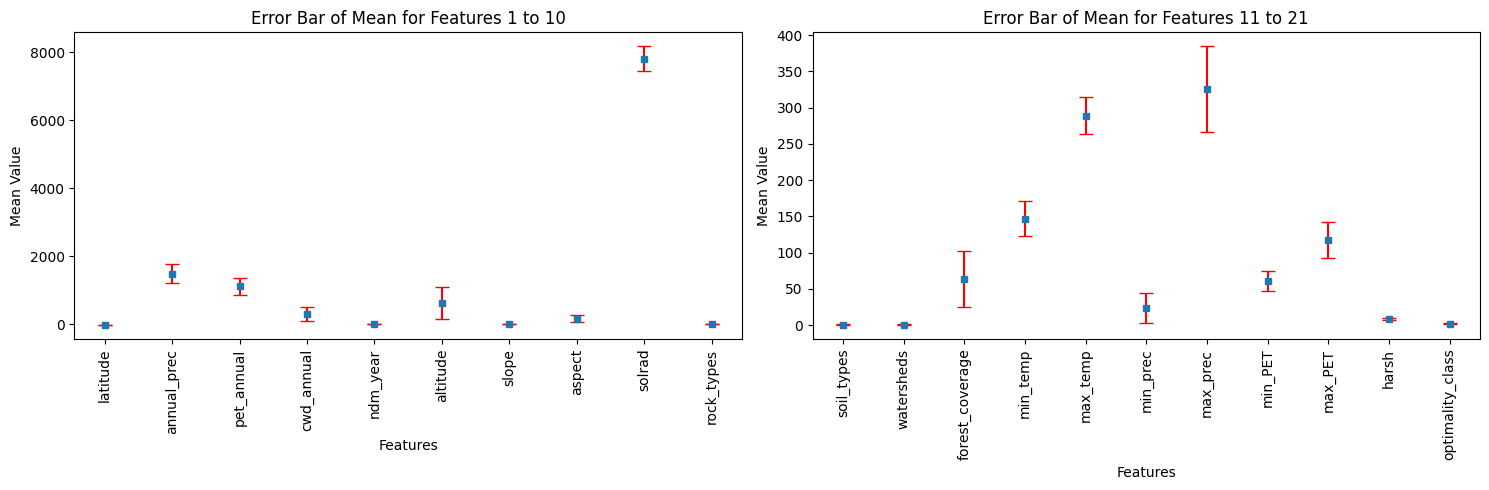

In [132]:
%matplotlib inline

def plot_graph(ax, data, val1, val2):
    data1 = data.iloc[:, val1:val2]
    means = np.mean(data1, axis=0)
    std_devs = np.std(data1, axis=0)
    features = data1.columns

    ax.errorbar(features, means, yerr=std_devs, capsize=5, ecolor='red', linestyle='None', marker='s', markersize=5)
    ax.set_xlabel('Features')
    ax.set_ylabel('Mean Value')
    ax.set_xticks(range(len(features)))  # Ensure correct tick positions
    ax.set_xticklabels(features, rotation=90)
    ax.set_title('Error Bar of Mean for Features {} to {}'.format(val1, val2 - 1))

# Create subplots with only one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust the figure size if necessary

# Plot each graph, ensure these indices are within the range of your DataFrame columns
plot_graph(axes[0], df_imputed, 1, 11)
plot_graph(axes[1], df_imputed, 11, 22)

plt.tight_layout()
plt.show()

In [133]:
# methode pour afficher plusieurs boxplot
def plot_boxplots(data, cols):
    num_plots = len(cols)
    num_rows = int((num_plots + 1) / 2)  # Round up for odd numbers
    num_cols = 2

    # Set up the grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

    if num_plots == 1:
        axes = [axes]

    for i, column in enumerate(cols):
        row = i // num_cols
        col = i % num_cols
        sns.boxplot(data=data, x=column, ax=axes[row][col])
        axes[row][col].set_title(f'Boxplot de {column}')
        axes[row][col].set_ylabel(column)
        axes[row][col].set_xlabel('')

    # Adjust layout
    plt.tight_layout()
    plt.show()

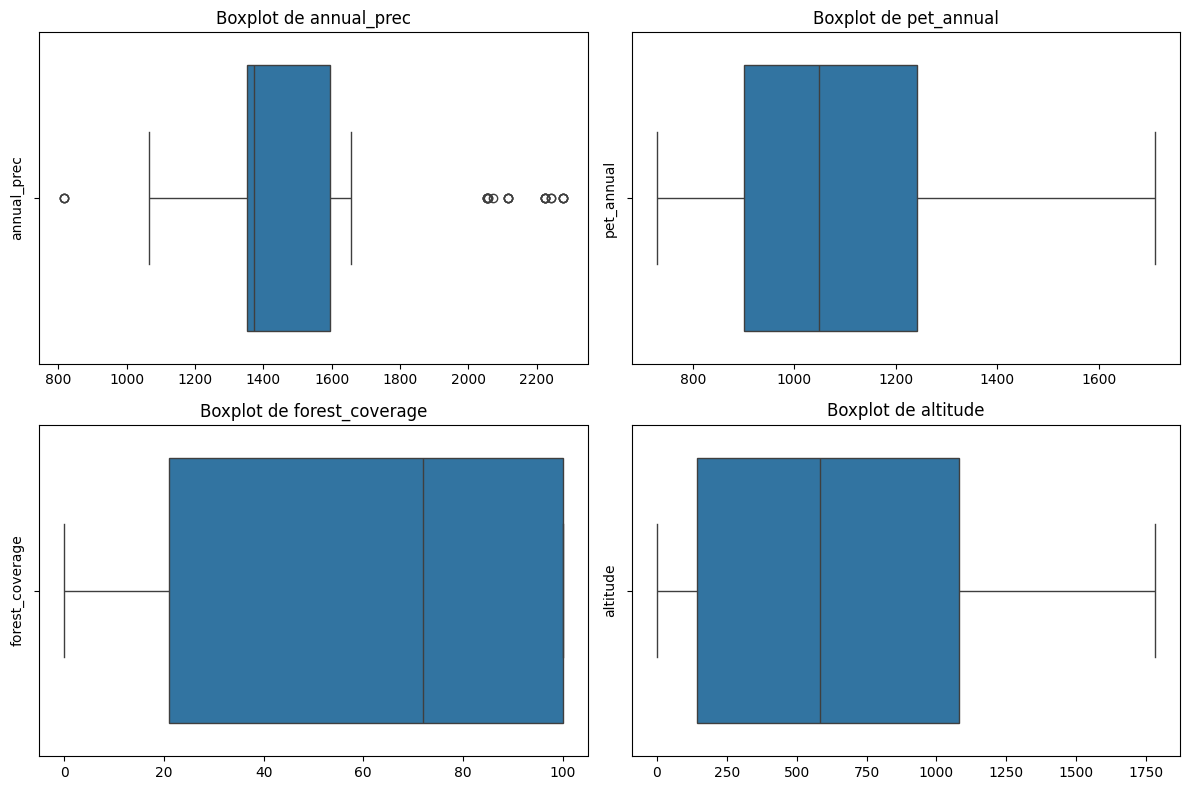

In [134]:
attributes = ['annual_prec', 'pet_annual', 'forest_coverage', 'altitude']
plot_boxplots(df_imputed, attributes)

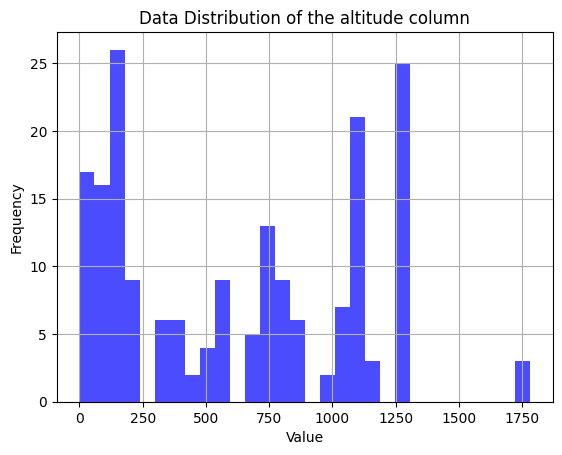

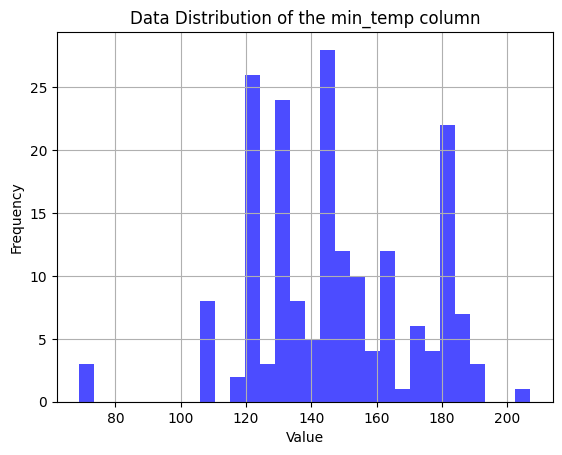

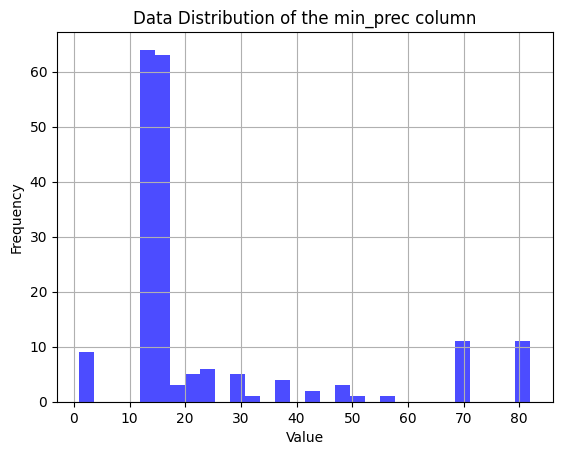

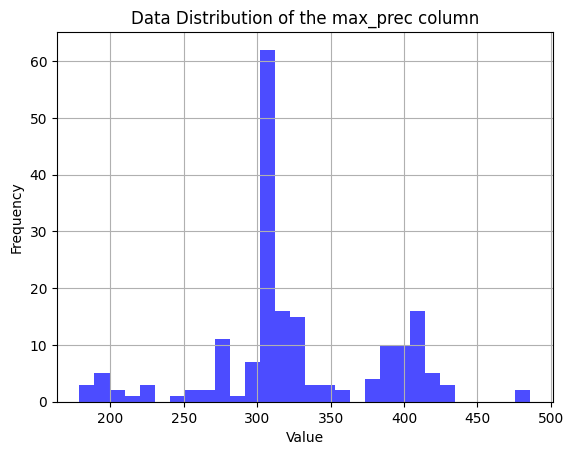

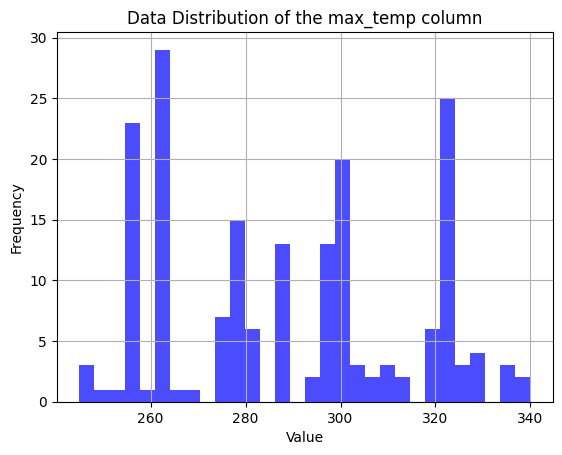

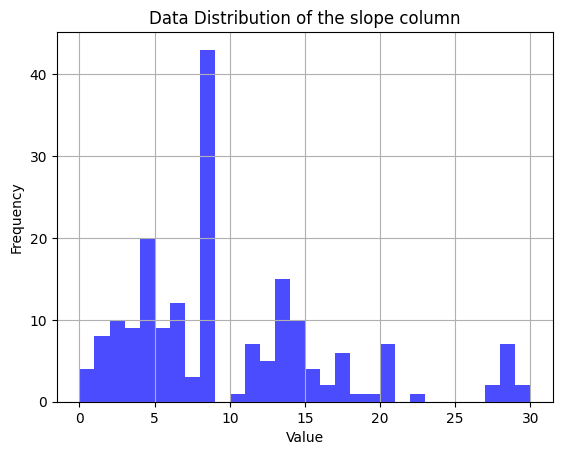

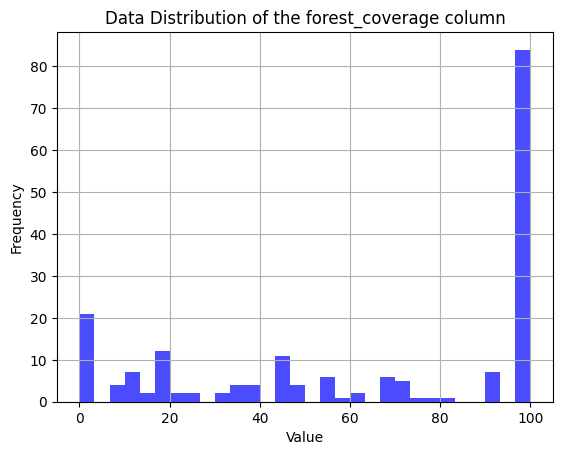

In [138]:
def plot_histo(val1):
    plt.hist(df_imputed[val1], bins=30, alpha=0.7, color='blue')
    plt.title('Data Distribution of the '+val1+' column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_histo('altitude')
plot_histo('min_temp')
plot_histo('min_prec')
plot_histo('max_prec')
plot_histo('max_temp')
plot_histo('slope')
plot_histo('forest_coverage')

In [4]:
import pandas as pd
df_imputed = pd.read_csv('coffea_simplified3.csv')

<Axes: xlabel='altitude'>

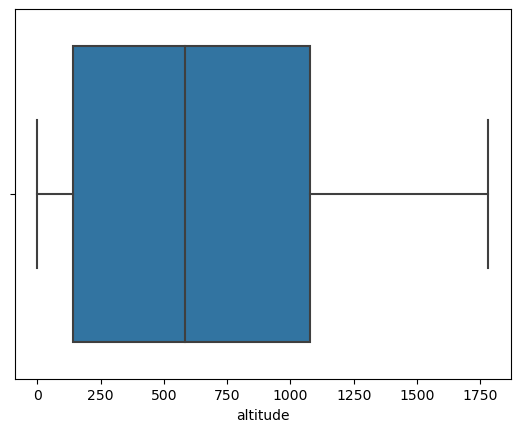

In [5]:
import plotly.express as px

#fig = px.violin(df_imputed, y="density", x="Class", color="Class", box=True, points="all",
 #         hover_data=data.columns)
fig = px.violin(df_imputed, y="altitude")
fig.show()

sns.boxplot(x="altitude", data = df_imputed)

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with multiple attributes
# Melt the DataFrame to long format
df_long = df_subset.melt()

# Create a violin plot for each attribute
plt.figure(figsize=(22, 6))
sns.violinplot(x='variable', y='value', data=df_subset.iloc[])
plt.xticks(rotation=45)
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.title('Violin Plot for Each Attribute')
plt.show()

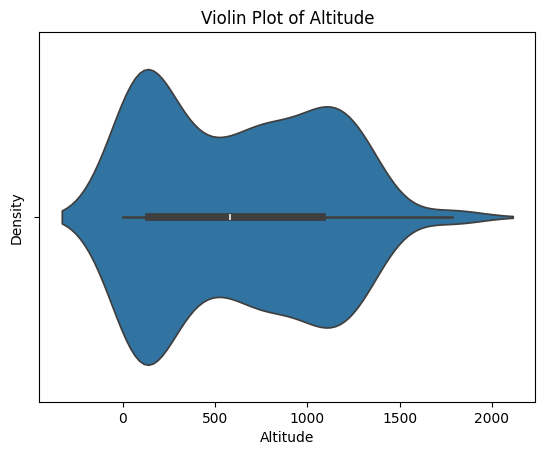

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is your DataFrame
# Create a violin plot using seaborn
sns.violinplot(x="altitude", data=df_imputed)
plt.title("Violin Plot of Altitude")
plt.xlabel("Altitude")
plt.ylabel("Density")
plt.show()


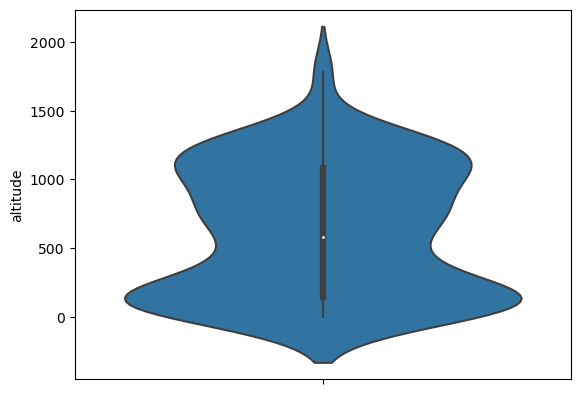

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df_imputed

# Create violin plot using Seaborn
sns.violinplot(y="altitude", data=df_imputed)

# Show plot
plt.show()


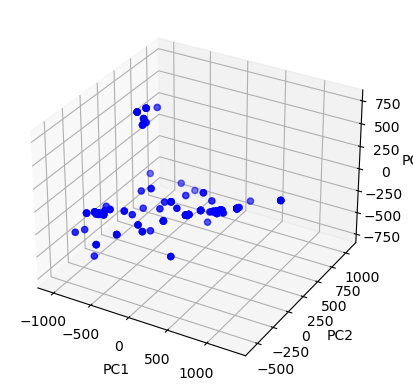

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Apply PCA to the scaled data
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c='b', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


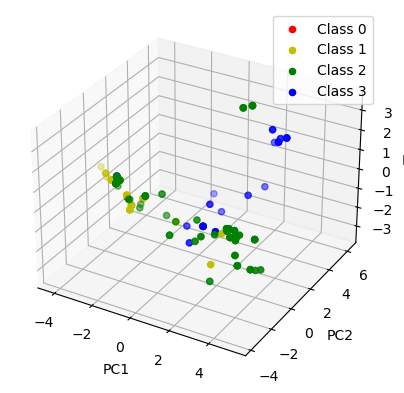

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Apply PCA to the scaled data
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])


# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
labels = df_imputed['optimality_class'].values

# Convert labels to integers if necessary
labels = labels.astype(int)

# Optionally, you can subtract the minimum value from the labels to make them start from 0
labels -= np.min(labels)
# List of unique class labels
unique_labels = set(labels)

# Define colors for each class
colors = ['r', 'y', 'g', 'b']  # Add more colors as needed

# Plot data points for each class
for label, color in zip(unique_labels, colors):
    indices = labels == label
    ax.scatter(principal_df.loc[indices, 'PC1'], principal_df.loc[indices, 'PC2'], principal_df.loc[indices, 'PC3'], c=color, label=f'Class {label}')

# Set labels for each axis
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add legend
ax.legend()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_preprocessed is your preprocessed DataFrame
# Assuming n_clusters is the number of clusters you want to visualize

# Standardize the features (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing Axes3D module for 3D plotting
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_preprocessed is your preprocessed DataFrame
# Assuming n_clusters is the number of clusters you want to visualize

# Standardize the features (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Clustering Visualization')

# Add color bar
plt.colorbar(scatter, label='Cluster')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull

# Assuming df_imputed is your preprocessed DataFrame

# Standardize the features (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Clustering Visualization')

# Add color bar
plt.colorbar(scatter, label='Cluster')

# Plot convex hulls around clusters
for cluster_label in range(4):
    cluster_points = principal_components[cluster_labels == cluster_label]
    hull = ConvexHull(cluster_points)
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], cluster_points[simplex, 2], 'k-')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull

# Assuming df_imputed is your preprocessed DataFrame

# Standardize the features (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
cluster_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Scatter plot with cluster labels
for cluster_label, color in zip(range(4), cluster_colors):
    cluster_points = principal_components[cluster_labels == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, alpha=0.5, label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clustering Visualization')

# Add legend
ax.legend()

# Plot convex hulls around clusters
for cluster_label, color in zip(range(4), cluster_colors):
    cluster_points = principal_components[cluster_labels == cluster_label]
    hull = ConvexHull(cluster_points)
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], cluster_points[simplex, 2], color=color, linestyle='-', linewidth=2)

plt.show()


In [48]:
import math 

# entropy
# entropy 1
def count_classes(vector):
    class_counts = {}
    for label in vector:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    num_classes = len(class_counts)
    return class_counts, num_classes

def calculate_entropy(vector):
    class_counts, num_classes = count_classes(vector)
    # Calculate the probabilities of each class
    class_probabilities = [count / len(vector) for count in class_counts.values()]
    # Calculate entropy using the formula
    entropy = -sum(p * math.log2(p) for p in class_probabilities)
    return entropy

def calculate_entropy_for_features(df):
    feature_entropies = {}
    for column in df:
        feature_vector = df[column]
        entropy_value = calculate_entropy(feature_vector)
        feature_entropies[column] = entropy_value
    return feature_entropies

def find_max_entropy_feature(df):
    max_entropy_feature = None
    max_entropy_value = float('-inf')  # Initialize with negative infinity
    for column in df.columns:
        feature_vector = df[column]
        entropy_value = calculate_entropy(feature_vector)
        if entropy_value > max_entropy_value:
            max_entropy_value = entropy_value
            max_entropy_feature = column
    # Remove the column with the maximum entropy feature
    df_after_removal = df.drop(columns=[max_entropy_feature])
    return max_entropy_feature, max_entropy_value, df_after_removal

def build_decision_tree(df):
    decision_tree_order = []
    while df.shape[1] > 1:  # Continue until only one attribute (column) is left
        max_entropy_feature, _, df = find_max_entropy_feature(df)
        decision_tree_order.append(max_entropy_feature)
    # Add the last remaining attribute without calculating its entropy
    decision_tree_order.append(df.columns[0])
    return decision_tree_order

decision_tree = build_decision_tree(df_imputed.iloc[:, 2:])
print(decision_tree)

['solrad', 'pet_annual', 'aspect', 'cwd_annual', 'annual_prec', 'altitude', 'max_prec', 'max_PET', 'max_temp', 'min_temp', 'min_PET', 'slope', 'forest_coverage', 'min_prec', 'ndm_year', 'harsh', 'optimality_class', 'soil_types', 'watersheds', 'rock_types']


In [82]:
dfe = pd.DataFrame(decision_tree, columns=['Feature'])

#print(dfe.head(10))

first_10_features = dfe['Feature'].head(10).tolist()
df_subset = df_imputed[first_10_features]

df_subset.loc[:,'optimality_class'] = df_imputed['optimality_class'].copy()

df_subset

C:\Users\adm\AppData\Local\Temp\ipykernel_34368\991271512.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,solrad,pet_annual,aspect,cwd_annual,annual_prec,altitude,max_prec,max_PET,max_temp,min_temp,optimality_class
0,8169.0,1108.0,12.0,391.0,1326.0,582.0,327.0,112.0,287.0,161.0,1.0
1,8169.0,1108.0,12.0,391.0,1326.0,582.0,327.0,112.0,287.0,161.0,1.0
2,8192.0,901.0,58.0,239.0,1353.0,1079.0,307.0,91.0,261.0,132.0,2.0
3,8169.0,1108.0,12.0,391.0,1326.0,582.0,327.0,112.0,287.0,161.0,1.0
4,7892.0,1515.0,358.0,623.0,1614.0,165.0,412.0,149.0,322.0,184.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
184,8252.0,911.0,10.0,246.0,1351.0,1095.0,308.0,93.0,263.0,133.0,1.0
185,8252.0,911.0,10.0,246.0,1351.0,1095.0,308.0,93.0,263.0,133.0,1.0
186,7888.0,1394.0,36.0,360.0,1420.0,171.0,273.0,144.0,310.0,181.0,2.0
187,7888.0,1394.0,36.0,360.0,1420.0,171.0,273.0,144.0,310.0,181.0,2.0


In [94]:

fig = px.violin(df_subset, y="annual_prec", x="optimality_class", color="optimality_class", box=True, points="all",
          hover_data=df_subset.columns)
fig.show()

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Split the data into features (X) and target variable (y)
X = df_subset.drop(columns=['optimality_class'])
y = df_subset['optimality_class']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate the decision tree model with optional hyperparameters
model = DecisionTreeClassifier(max_depth=3)  
# 4. Fit the model to the training data
model.fit(X_train, y_train)

# 5. Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model (optional)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9210526315789473


In [90]:
from sklearn.metrics import f1_score

# Assuming 'predictions' are the predicted labels and 'y_test' are the true labels
f1 = f1_score(y_test, predictions, average="weighted")

print("F1-score:", f1)

F1-score: 0.9232589048378522


In [101]:
# Step 2: Split the Data
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the Random Forest Model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.60      0.75         5
         2.0       0.93      1.00      0.97        28
         3.0       1.00      1.00      1.00         5

    accuracy                           0.95        38
   macro avg       0.98      0.87      0.91        38
weighted avg       0.95      0.95      0.94        38



c:\Users\adm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.



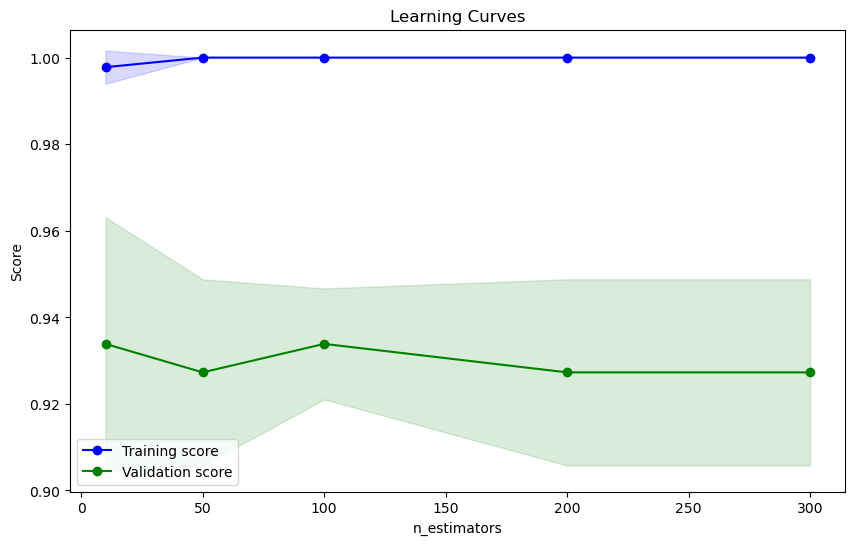

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define range of values for n_estimators
param_range = [10, 50, 100, 200, 300]

# Calculate learning curves
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train,
                                              param_name='n_estimators', param_range=param_range,
                                              cv=4, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='green', marker='o')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


c:\Users\adm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.



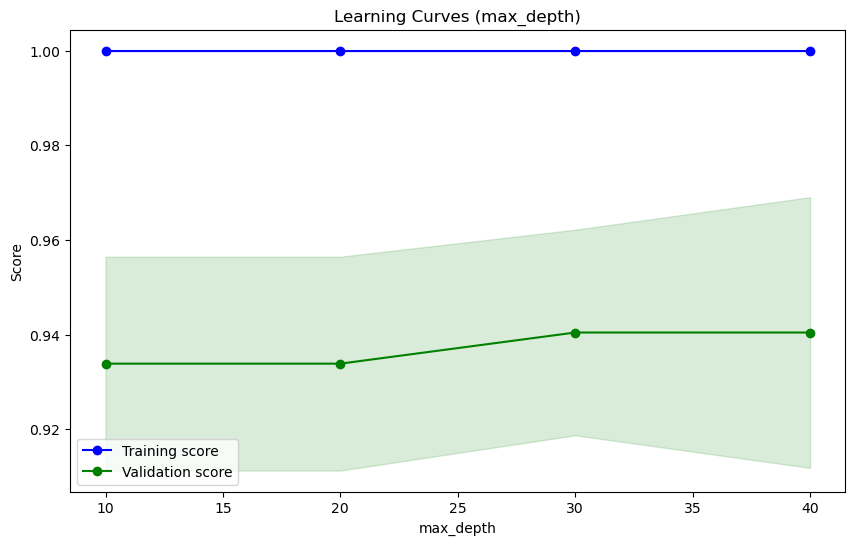

In [104]:
# Define range of values for max_depth
param_range = [0, 10, 20, 30, 40]

# Calculate learning curves
train_scores, valid_scores = validation_curve(RandomForestClassifier(n_estimators=100), X_train, y_train,
                                              param_name='max_depth', param_range=param_range,
                                              cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='green', marker='o')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Learning Curves (max_depth)')
plt.legend()
plt.show()


c:\Users\adm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



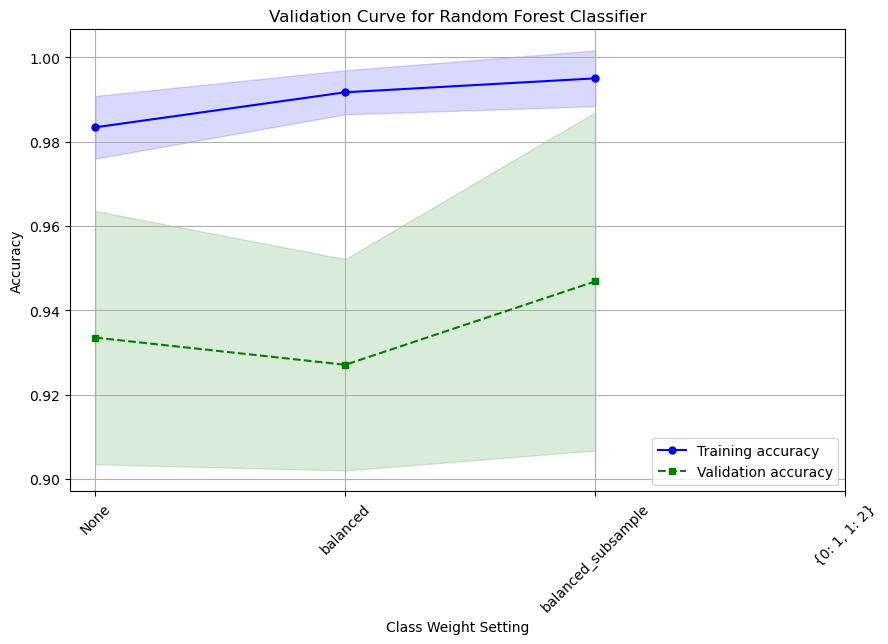

In [113]:
# Define the range of values for the class_weight hyperparameter
param_range = [None, 'balanced', 'balanced_subsample', {0: 1, 1: 2}] # List of dictionaries

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5)

# Calculate training and validation scores for different values of the class_weight hyperparameter
train_scores, valid_scores = validation_curve(
    estimator=rf_classifier,
    X=X_train,
    y=y_train,
    param_name='class_weight',
    param_range=param_range,
    cv=5
)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_range)), train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(range(len(param_range)), train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(range(len(param_range)), valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(range(len(param_range)), valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Class Weight Setting')
plt.ylabel('Accuracy')
plt.xticks(range(len(param_range)), ['None', 'balanced', 'balanced_subsample', '{0: 1, 1: 2}'], rotation=45)
plt.legend(loc='lower right')
plt.title('Validation Curve for Random Forest Classifier')
plt.grid()
plt.show()


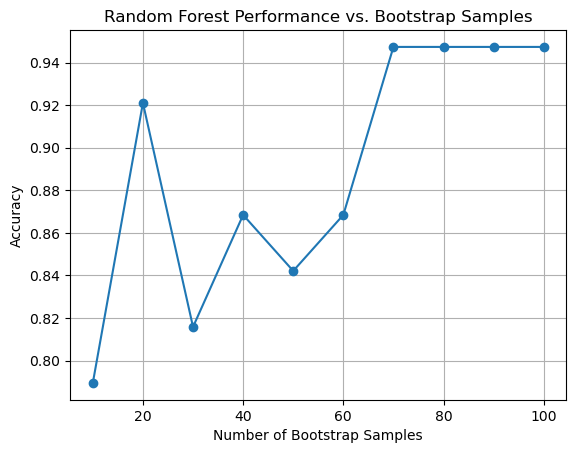

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Generate a range of bootstrap sample sizes
bootstrap_sizes = range(10, 101, 10)  # Example: from 10 to 100 with a step of 10

# Initialize lists to store performance scores
accuracy_scores = []

# Train and evaluate Random Forest for each bootstrap sample size
for size in bootstrap_sizes:
    # Train Random Forest classifier with current bootstrap sample size
    clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=size)
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy score and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the performance scores against the number of bootstrap samples
plt.plot(bootstrap_sizes, accuracy_scores, marker='o')
plt.xlabel('Number of Bootstrap Samples')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs. Bootstrap Samples')
plt.grid(True)
plt.show()

c:\Users\adm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



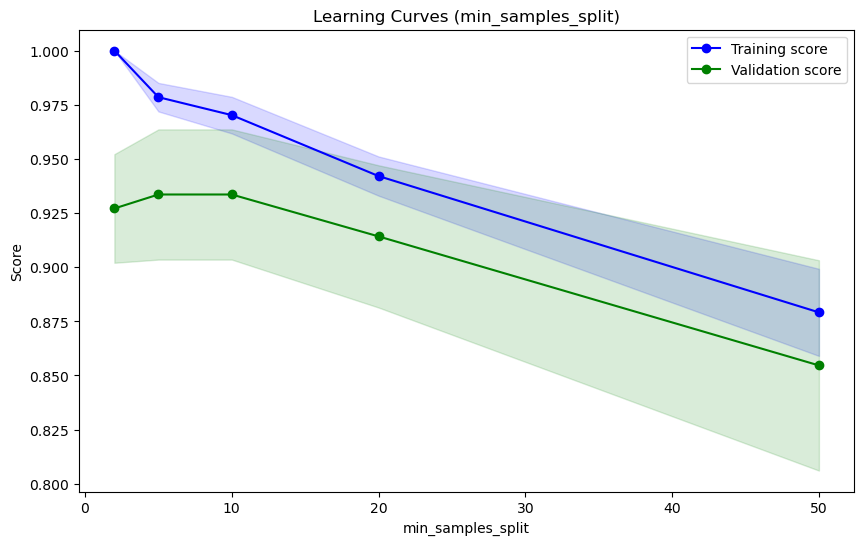

In [108]:
# Define range of values for max_depth
param_range = [2, 5, 10, 20, 50]

# Calculate learning curves
train_scores, valid_scores = validation_curve(RandomForestClassifier(n_estimators=100), X_train, y_train,
                                              param_name='min_samples_split', param_range=param_range,
                                              cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='green', marker='o')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Learning Curves (min_samples_split)')
plt.legend()
plt.show()

c:\Users\adm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



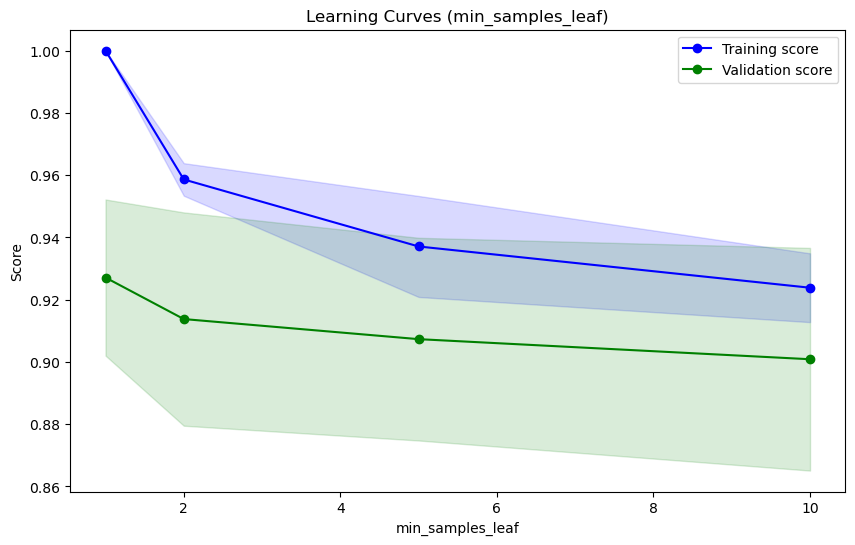

In [107]:

param_range = [1, 2, 5, 10]

# Calculate learning curves
train_scores, valid_scores = validation_curve(RandomForestClassifier(n_estimators=100), X_train, y_train,
                                              param_name='min_samples_leaf', param_range=param_range,
                                              cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='green', marker='o')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.xlabel('min_samples_leaf')
plt.ylabel('Score')
plt.title('Learning Curves (min_samples_leaf)')
plt.legend()
plt.show()

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

# Assuming X_train and X_test are your input data for training and testing
# Reshape input data for CNN (if needed)
X_train_cnn = X_train.copy()  # No need to reshape for 1D data
X_test_cnn = X_test.copy()

# Design CNN architecture
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),  # Input shape (num_features, 1)
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Fit the model to the training data
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the CNN Model
# Evaluate model performance on testing data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)

# Make predictions on the testing data
y_pred_probabilities = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_probabilities, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn, zero_division=1))



Epoch 1/10


c:\Users\adm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4792 - loss: 165.9654 - val_accuracy: 0.3226 - val_loss: 21.2640
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5056 - loss: 30.1145 - val_accuracy: 0.5484 - val_loss: 110.5631
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6171 - loss: 56.9520 - val_accuracy: 0.5484 - val_loss: 43.5444
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4873 - loss: 48.0578 - val_accuracy: 0.5484 - val_loss: 75.9565
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6333 - loss: 78.9465 - val_accuracy: 0.5484 - val_loss: 55.5932
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5706 - loss: 30.1812 - val_accuracy: 0.5806 - val_loss: 8.6165
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6329 - loss: 21.4835 - val_accuracy: 0.5484 - val_loss: 32.8260
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4733 - loss: 21.0831 - val_accuracy: 0.5806 - val_loss: 32.5918
E

In [118]:
X_train.shape


(151, 10)

Epoch 1/10


c:\Users\adm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2044 - loss: 367.4260 - val_accuracy: 0.0000e+00 - val_loss: 167.6406
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0756 - loss: 132.7122 - val_accuracy: 0.5484 - val_loss: 37.8198
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6073 - loss: 34.1754 - val_accuracy: 0.5484 - val_loss: 33.6699
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5869 - loss: 22.6517 - val_accuracy: 0.5161 - val_loss: 11.5253
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4669 - loss: 12.6477 - val_accuracy: 0.5484 - val_loss: 13.5392
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6052 - loss: 14.3941 - val_accuracy: 0.6129 - val_loss: 5.6196
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5854 - loss: 8.8392 - val_accuracy: 0.5806 - val_loss: 6.8650
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6592 - loss: 8.1875 - val_accuracy: 0.6774 - val_loss: 4.06

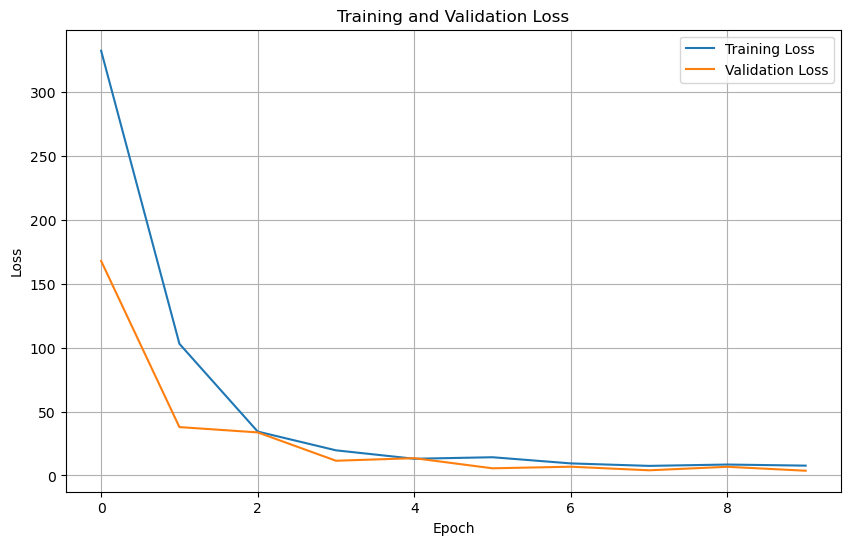

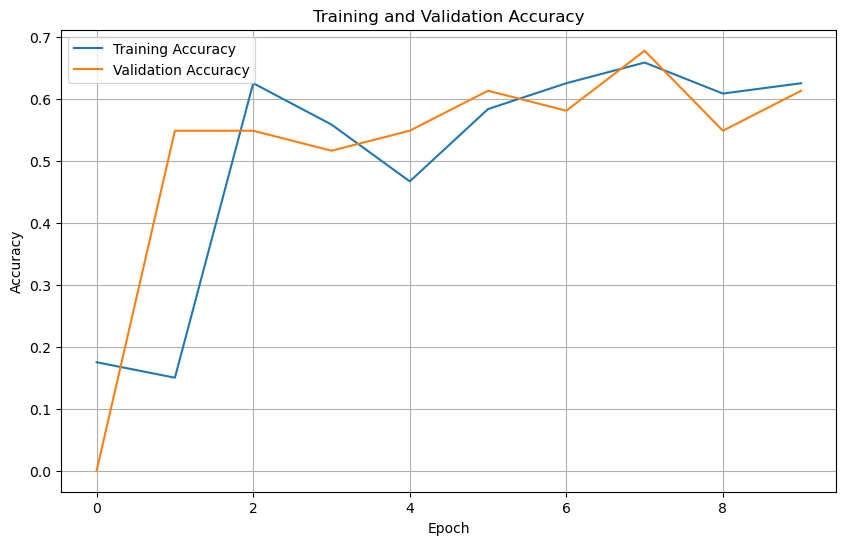

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming you have one-dimensional data with 100 time steps
# Define input shape and other parameters
#input_shape = (151, 1)  # 100 time steps, 1 feature/channel
num_classes = 4  # Example: binary classification
X_train_cnn = X_train.copy()  # No need to reshape for 1D data
X_test_cnn = X_test.copy()
# Build a 1D CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot training history (loss and accuracy)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\adm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



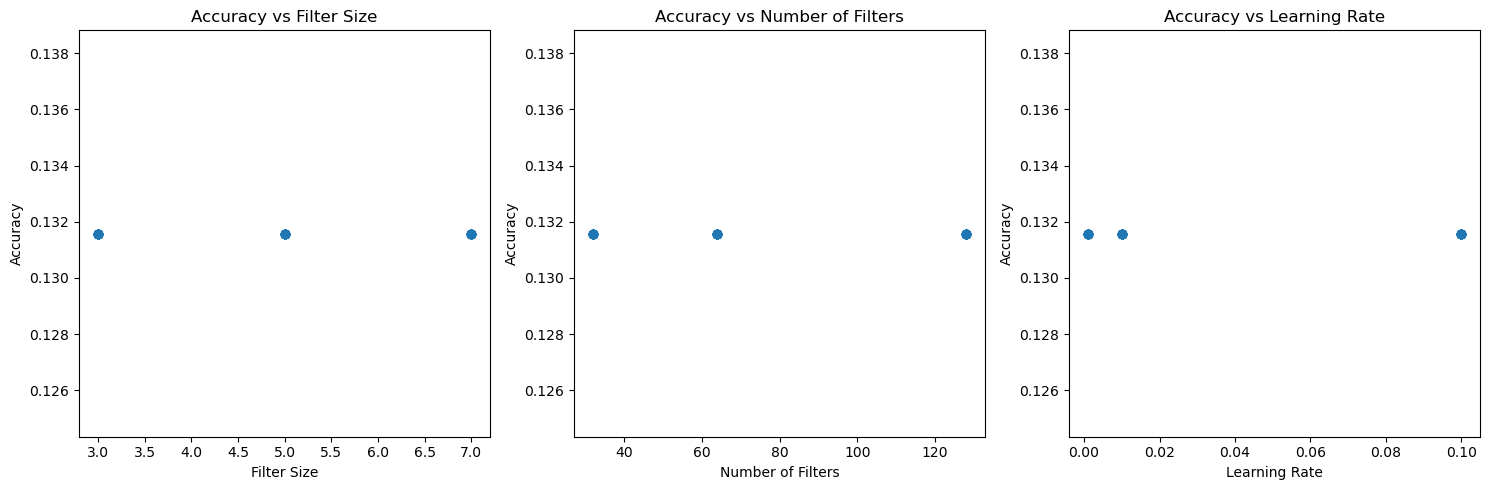

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# Define hyperparameter ranges to test
filter_sizes = [3, 5, 7]
num_filters = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

# Placeholder for accuracy results
accuracies = []

# Iterate over each combination of hyperparameters
for fs in filter_sizes:
    for nf in num_filters:
        for lr in learning_rates:
            # Define and compile the CNN model
            model = Sequential([
                Conv1D(filters=nf, kernel_size=fs, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
                MaxPooling1D(2),
                Flatten(),
                Dense(64, activation='relu'),
                Dense(1, activation='sigmoid')
            ])
            model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
            
            # Train the model
            model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)
            
            # Evaluate accuracy on the test set
            _, accuracy = model.evaluate(X_test_cnn, y_test, verbose=0)
            
            # Store the accuracy along with the hyperparameters
            accuracies.append((fs, nf, lr, accuracy))

# Extract results
filter_sizes, num_filters, learning_rates, accuracies = zip(*accuracies)

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(filter_sizes, accuracies)
ax[0].set_xlabel('Filter Size')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs Filter Size')

ax[1].scatter(num_filters, accuracies)
ax[1].set_xlabel('Number of Filters')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy vs Number of Filters')

ax[2].scatter(learning_rates, accuracies)
ax[2].set_xlabel('Learning Rate')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy vs Learning Rate')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define ranges for different parameters
conv_layers = [1, 2, 3, 4, 5]
kernel_sizes = [(3,), (5,), (7,)]
pool_sizes = [(2,), (3,), (4,)]
dense_layers = [1, 2, 3]
neurons = [64, 128, 256]
dropouts = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.01, 0.1]

results = []

# Iterate over different parameter combinations
for conv in conv_layers:
    for kernel in kernel_sizes:
        for pool in pool_sizes:
            for dense in dense_layers:
                for neuron in neurons:
                    for dropout in dropouts:
                        for lr in learning_rates:
                            # Build the CNN model
                            model = Sequential()
                            model.add(Conv1D(neuron, kernel_size=kernel, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
                            model.add(MaxPooling1D(pool_size=pool))
                            for _ in range(conv - 1):
                                model.add(Conv1D(neuron, kernel_size=kernel, activation='relu'))
                                model.add(MaxPooling1D(pool_size=pool))
                            model.add(Flatten())
                            for _ in range(dense):
                                model.add(Dense(neuron, activation='relu'))
                                model.add(Dropout(dropout))
                            model.add(Dense(10, activation='softmax'))

                            # Compile the model
                            optimizer = Adam(learning_rate=lr)
                            model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

                            # Train the model
                            history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=0)

                            # Evaluate the model
                            loss, accuracy = model.evaluate(X_test_cnn, y_test, verbose=0)
                            
                            # Store the results
                            results.append({
                                'conv_layers': conv,
                                'kernel_size': kernel,
                                'pool_size': pool,
                                'dense_layers': dense,
                                'neurons': neuron,
                                'dropout': dropout,
                                'learning_rate': lr,
                                'accuracy': accuracy
                            })

# Plot the results
accs = [res['accuracy'] for res in results]
plt.hist(accs, bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy')
plt.show()


In [73]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Iterate over each column in the DataFrame
for column in df_imputed.columns:
    # Add a violin trace for the current column
    fig.add_trace(go.Violin(y=df_imputed[column], name=column, box_visible=True, meanline_visible=True))

# Update layout
fig.update_layout(title='Violin Plots for Each Column', yaxis_title='Value')

# Show the figure
fig.show()




In [79]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Iterate over each column in the DataFrame except 'solrad' and 'optimality_class'
for column in df_subset.columns:
    if column not in ['solrad', 'optimality_class']:
        # Add a violin trace for the current column
        fig.add_trace(go.Violin(y=df_subset[column], name=column, box_visible=True, meanline_visible=True))

# Update layout
fig.update_layout(title='Violin Plots for Each Column (Excluding solrad and optimality_class)', yaxis_title='Value')

# Show the figure
fig.show()


In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create an empty figure with 3 subplots
fig = make_subplots(rows=1, cols=3)

# Define subsets of columns
subset1_columns = ['pet_annual', 'aspect', 'cwd_annual', 'annual_prec', 'altitude']
subset2_columns = ['max_prec', 'max_PET', 'max_temp', 'min_temp']
subset3_columns = ['solrad']

# Add violin plots for each subset
for i, subset_columns in enumerate([subset1_columns, subset2_columns, subset3_columns], start=1):
    # Add violin trace for each column in the subset to the corresponding subplot
    for column in subset_columns:
        fig.add_trace(go.Violin(y=df_subset[column], name=column, box_visible=True, meanline_visible=True), row=1, col=i)

# Update layout
fig.update_layout(title_text="Violin Plots for the 10 best attributes", height=600)

# Show the figure
fig.show()
